In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/Diabetes Missing Data.csv


In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
!pip install lazypredict
import lazypredict
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
df = pd.read_csv("/kaggle/input/diabetes-dataset/Diabetes Missing Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [51]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.00,72.00,35.00,NaN,33.60,0.63,50,1
1,1,85.00,66.00,29.00,NaN,26.60,0.35,31,0
2,8,183.00,64.00,NaN,NaN,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


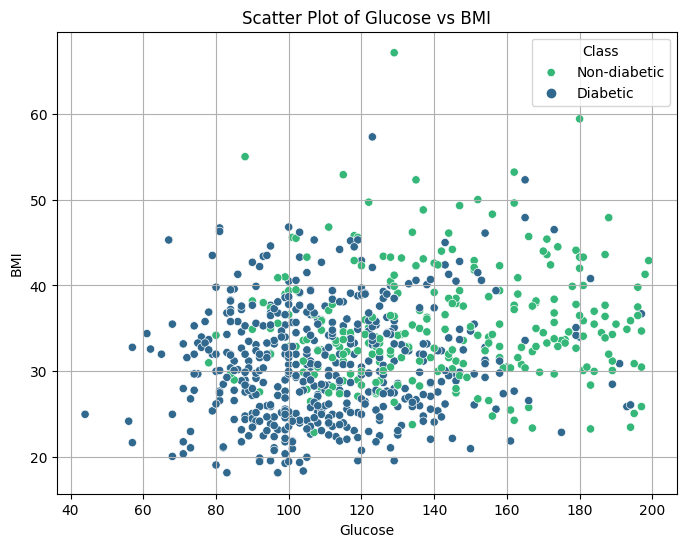

In [52]:
columns_to_plot = ['Glucose', 'BMI', 'Class']
df_plot = df_imputed[columns_to_plot]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Class', data=df_plot, palette='viridis')
plt.title('Scatter Plot of Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Class', loc='upper right', labels=['Non-diabetic', 'Diabetic'])
plt.grid(True)
plt.show()

In [53]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [54]:
# Assuming 'Class' is the target column and the rest are features
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']  # Target variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)


100%|██████████| 29/29 [00:01<00:00, 17.13it/s]

[LightGBM] [Info] Number of positive: 123, number of negative: 261
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 489
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.320312 -> initscore=-0.752336
[LightGBM] [Info] Start training from score -0.752336
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Training Logistic Regression...


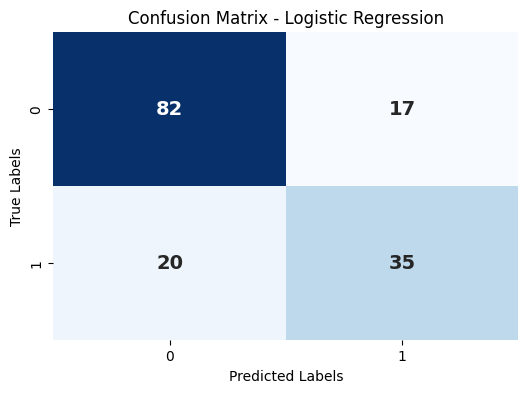


Logistic Regression Performance:
Accuracy: 0.7597402597402597
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82        99
         1.0       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



Training Random Forest...


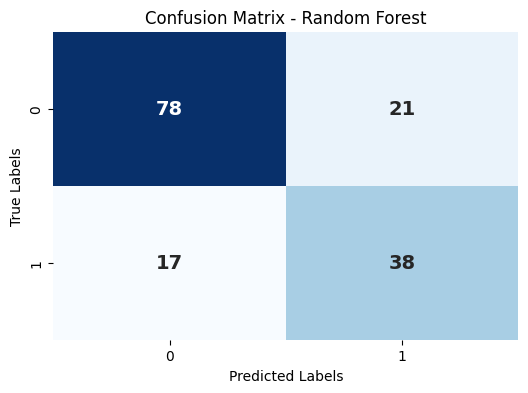


Random Forest Performance:
Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80        99
         1.0       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



Training Gradient Boosting...


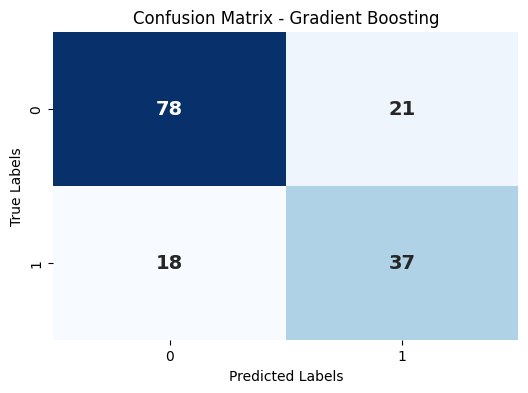


Gradient Boosting Performance:
Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80        99
         1.0       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Training SGDClassifier...


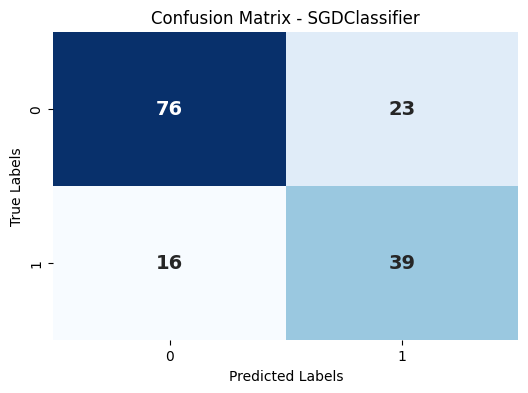


SGDClassifier Performance:
Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80        99
         1.0       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154





In [56]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(columns=['Class'])
y = df_imputed['Class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SGDClassifier' : SGDClassifier(random_state=42)
}
# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    annot_kws={'fontsize': 14, 'fontweight': 'bold'})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")